In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.metrics import mean_squared_error as MSE
from tqdm import tqdm #使えると便利　プログレスバーの表示
import random

### 教師データ

In [2]:
x1=[0.1, 0.9, 0.1, 0.9]
x2=[0.1, 0.1, 0.9, 0.9]
d=[0.1, 0.9, 0.9, 0.1]

## 活性化関数(シグモイド)

In [3]:
def sigmoid(u):
    Activated_u = 1/(1+math.exp(-u)) 
    return Activated_u

## 中間層

#### 状態方程式

In [4]:
def mid_neuron(w1, x1, w2, x2, sita_mid, BP=False):
    mid_state = w1*x1+w2*x2+sita_mid
    mid_out = sigmoid(mid_state)
    if BP == True:
        return mid_state
    return mid_out

#### 重み更新

In [5]:
def weight_mid(w, lr, signal, x):
    weight_mid_next  = w+lr*signal*x
    return  weight_mid_next

#### バイアス更新

In [6]:
def bias_mid(sita, lr, signal):
    bias_mid_next  = sita+lr*signal*1
    return bias_mid_next

#### 学習信号の計算

In [7]:
def learning_signal(u_mid, d, out, u_out,weight_out):
    signal =(1-sigmoid(u_mid))*sigmoid(u_mid)*(d-out)*(1-sigmoid(u_out))*sigmoid(u_out)*weight_out
    return signal

## 出力層 

#### 状態方程式

In [8]:
def out_neuron(w1, y1, w2, y2, sita_out, BP=False):
    out_state = w1*y1+w2*y2+sita_out 
    output= sigmoid(out_state)
    if BP == True:
        return out_state
    return output

#### 重み更新

In [9]:
def weight_out(w, lr, d, out, u, mid_out):
    weight_out_next = w+lr*(d-out)*(1-sigmoid(u))*sigmoid(u)*mid_out 
    return weight_out_next

#### バイアス更新

In [10]:
def bias_out(sita, lr, d, out, u):
    bias_out_next = sita+lr*(d-out)*(1-sigmoid(u))*sigmoid(u)*1
    return bias_out_next

### 重みと閾値の初期値

In [11]:
w1 = random.uniform(-0.001,0.001)
w2 = random.uniform(-0.001,0.001)
w11 = random.uniform(-0.001,0.001)
w12 = random.uniform(-0.001,0.001)
w21 = random.uniform(-0.001,0.001)
w22 = random.uniform(-0.001,0.001)
sita = random.uniform(-0.001,0.001)
sita1 = random.uniform(-0.001,0.001)
sita2 = random.uniform(-0.001,0.001)

## 計算

In [12]:
lr = 0.01
epoc = 30000#学習回数

In [13]:
rmse=[]
for i in tqdm(range(epoc)):
    y_save=[]
    for j in range(len(x1)):
        #各層の出力計算
        y1 = mid_neuron(w11, x1[j], w12, x2[j], sita1)
        y2 = mid_neuron(w21, x1[j], w22, x2[j], sita2)
        y = out_neuron(w1, y1, w2, y2, sita) 
        y_save.append(y)
           
        #出力層更新
        u = out_neuron(w1, y1, w2, y2, sita, BP=True)
        w1 = weight_out(w1, lr, d[j], y, u, y1)
        w2 = weight_out(w2, lr, d[j], y, u, y2)
        sita = bias_out(sita, lr, d[j], y, u)
        
        #中間層更新 
        #各層の状態取得
        u = out_neuron(w1, y1, w2, y2, sita, BP=True)
        u1 = mid_neuron(w11, x1[j], w12, x2[j], sita1, BP=True)
        u2 = mid_neuron(w21, x1[j], w22, x2[j], sita2, BP=True)
        
        #中間層1番目のニューロン更新
        signal_1 =  learning_signal(u1, d[j], y, u, w1)
        w11 = weight_mid(w11, lr, signal_1, x1[j])
        w12 = weight_mid(w12, lr, signal_1, x2[j])
        sita1 = bias_mid(sita1, lr, signal_1)
        
        #中間層2番目のニューロン更新
        signal_2 =  learning_signal(u2, d[j], y, u, w2)
        w21 = weight_mid(w21, lr, signal_2, x1[j])
        w22 = weight_mid(w22, lr, signal_2, x2[j])
        sita2 = bias_mid(sita2, lr, signal_2)
    
    error = np.sqrt(MSE(d,y_save))
    rmse.append(error)

100%|██████████████████████████████████████████████████████████████████████████| 30000/30000 [00:04<00:00, 6364.40it/s]


In [14]:
print(y_save)

[0.49999971358814244, 0.49962364300186934, 0.49999993903820916, 0.5003764798920451]


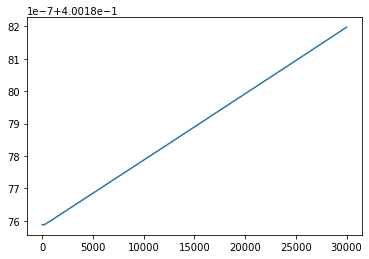

In [15]:
plt.plot(rmse)